# Fitness Class Attention

**Problem** : Many membors reserved a class but didn't attend.

**Requirement** : Predict new incoming booking whether membor will attend or not.

**Business outcome** : Fitness can serve their class to more customers. More membors in a class, more impressive, better experience.

This notebook will show :
1. Some insights that probably be helpful.
2. Maching learning model to predict whether membor will join the class or not.

### Intro

In [360]:
#import module
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Import raw data (local file)**

In [361]:
file_path = 'C:\\Users\\User\\Documents\\GitHub\\project\\fitness_attention_prediction\\fitness_class_2212.csv'
data = pd.read_csv(file_path)

In [362]:
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [363]:
data.set_index('booking_id', inplace = True)

In [364]:
data.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,,,,,,,
1,17,79.56,8,Wed,PM,Strength,0
2,10,79.01,2,Mon,AM,HIIT,0
3,16,74.53,14,Sun,AM,Strength,0
4,5,86.12,10,Fri,AM,Cycling,0
5,15,69.29,8,Thu,AM,HIIT,0


-----------------------------------------------------------------------------

### Preprocessing Data

Do a little missing data check up!

In [365]:
data.isnull().sum()

months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

There is only 20 NA values in weight columns from all 1500 rows. So, I decided to drop all missing values.

In [366]:
data = data.dropna()

In [367]:
data.duplicated().sum()

0

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 1 to 1500
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1480 non-null   int64  
 1   weight            1480 non-null   float64
 2   days_before       1480 non-null   object 
 3   day_of_week       1480 non-null   object 
 4   time              1480 non-null   object 
 5   category          1480 non-null   object 
 6   attended          1480 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 92.5+ KB


In [369]:
data.days_before.value_counts()

10         290
2          197
8          190
12         177
14         170
4          153
6           70
7           37
3           31
5           27
11          25
13          25
15          24
9           23
1            8
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64

There are some excess words in data. So, it should be trimmed out then convert them to integer.

In [370]:
data['days_before'] = data.days_before.str.strip(' days').astype('int')
data.days_before.value_counts()

10    296
2     198
8     191
12    180
14    173
4     156
6      73
7      38
3      32
5      28
13     26
11     25
15     24
9      23
1       9
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

That's what we want!
Let's check the next one, day_of_week.

In [371]:
data.day_of_week.value_counts()

Fri          277
Thu          235
Mon          215
Sun          211
Sat          200
Tue          192
Wed           79
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

There are some exceed categories which are duplicated with other. Let's change them to the right one.

In [372]:
mapping = {'Fri.':'Fri', 'Wednesday':'Wed', 'Monday':'Mon'}
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [373]:
data.day_of_week.value_counts()

Fri          277
Thu          235
Mon          215
Sun          211
Sat          200
Tue          192
Wed           79
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

Great!
Then, it will be great if 'day_of_week' feature is sortable. It makes me easier for data visualization.

In [374]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data.day_of_week = pd.Categorical(data.day_of_week, categories = days)

In [375]:
data.time.value_counts()

AM    1130
PM     350
Name: time, dtype: int64

In [376]:
data.category.value_counts()

HIIT        657
Cycling     370
Strength    231
Yoga        135
Aqua         74
-            13
Name: category, dtype: int64

In [377]:
data.attended.value_counts()

0    1031
1     449
Name: attended, dtype: int64

In [378]:
data.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,,,,,,,
1,17,79.56,8,Wed,PM,Strength,0
2,10,79.01,2,Mon,AM,HIIT,0
3,16,74.53,14,Sun,AM,Strength,0
4,5,86.12,10,Fri,AM,Cycling,0
5,15,69.29,8,Thu,AM,HIIT,0


### Exploratory Data Analysis

**How many bookings attended the class?**

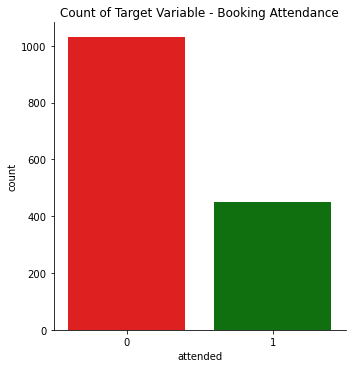

In [389]:
sns.catplot(data = data, x = 'attended', kind = 'count', palette=['red', 'green'])
plt.title('Count of Target Variable - Booking Attendance')
plt.show()

From above graph, the data is imbalance. Almost 70% of bookings were not attended.

**The Distribution of the Number of Months As a Member.**

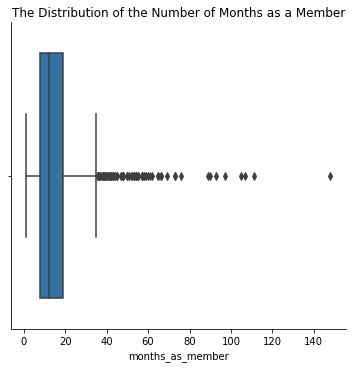

In [380]:
sns.catplot(data = data, x = 'months_as_member', kind = 'box')
plt.title('The Distribution of the Number of Months as a Member')
plt.show()

The distribution of the number of months as member is very skewed. Most of members have stayed in membership between 1 - 40 months. From boxplot, over 75 percent of members have been in membership less than 20 months.

**Attendance vs. Months as a member**

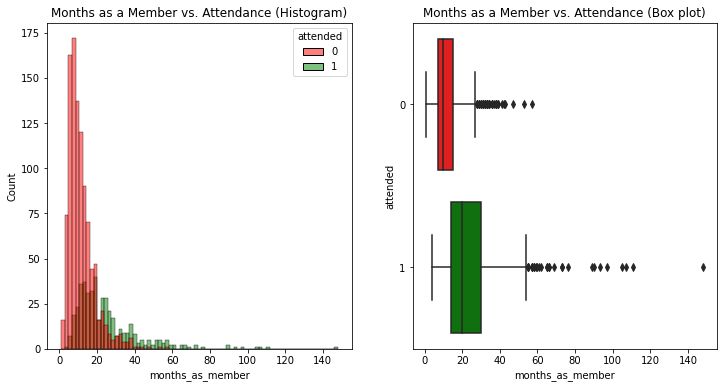

In [381]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

sns.histplot(data = data, x = 'months_as_member', hue = 'attended', ax = ax1, palette=['red', 'green'])
ax1.set_title('Months as a Member vs. Attendance (Histogram)')

data['attended'] = data['attended'].astype('category')
sns.boxplot(data = data, x = 'months_as_member', y = 'attended', ax = ax2, palette=['red', 'green'])
ax2.set_title('Months as a Member vs. Attendance (Box plot)')
plt.show(fig)

There are very low attendance rate between 1 - 20 months. After 20 months, members tend to attend the booked classed more than not. We will see that the data is significantly right-skewed.

The data range of members who **did not attend** and **attended** are clearly different. The class 0 is obviously less. We will see that the 75th percentile of class 0 is about the 25th percentile of class 1.

It is clearly found that **members who has been a membership for longer time tend to attend class more.** 

**Membership duration vs. Weight**

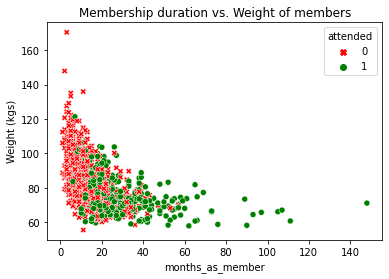

In [382]:
markers = {1: "o", 0 : "X"}
sns.scatterplot(data = data, x = 'months_as_member', y = 'weight', hue = 'attended', palette=['red', 'green'], markers = markers, style = 'attended')
plt.title('Membership duration vs. Weight of members')
plt.ylabel('Weight (kgs)')
plt.show()

Membors who have been in memborship longer and has less weight attend their booked class more often, **significantly**.

### Preprocessing Data for machine learning model

In [383]:
day_dummies = pd.get_dummies(data['day_of_week'], drop_first=True)
category_dummies = pd.get_dummies(data['category'], drop_first= True)
data = pd.concat([data, day_dummies, category_dummies], axis = 1)
data = data.drop(['day_of_week', 'category'], axis = 1)
data['attended'] = data['attended'].astype('int')
data['time'] = data['time'].map({'AM':0, 'PM':1})

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 1 to 1500
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1480 non-null   int64  
 1   weight            1480 non-null   float64
 2   days_before       1480 non-null   int32  
 3   time              1480 non-null   int64  
 4   attended          1480 non-null   int32  
 5   Tue               1480 non-null   uint8  
 6   Wed               1480 non-null   uint8  
 7   Thu               1480 non-null   uint8  
 8   Fri               1480 non-null   uint8  
 9   Sat               1480 non-null   uint8  
 10  Sun               1480 non-null   uint8  
 11  Aqua              1480 non-null   uint8  
 12  Cycling           1480 non-null   uint8  
 13  HIIT              1480 non-null   uint8  
 14  Strength          1480 non-null   uint8  
 15  Yoga              1480 non-null   uint8  
dtypes: float64(1), int32(2), int64(2), uint8(1

In [385]:
X = data.drop('attended', axis = 1)
y = data['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

### Create model

In [386]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print('The Accuracy of Logistic Regression model is : {:.2f}'.format(accuracy_score(y_test, y_pred_log)))

The Accuracy of Logistic Regression model is : 0.76


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [387]:
rf = RandomForestClassifier(max_depth=6,
                            random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('The Accuracy of Random Forest model is {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))

The Accuracy of Random Forest model is 0.77


In [388]:
print(confusion_matrix(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[280  29]
 [ 76  59]]
[[279  30]
 [ 70  65]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       309
           1       0.68      0.48      0.57       135

    accuracy                           0.77       444
   macro avg       0.74      0.69      0.71       444
weighted avg       0.76      0.77      0.76       444



From confusion matrix, the random forest model is better.

### Conclusion

We can create the model using random forest classifier that can predict attendance with **precision of 80%**. Moreover, we found some useful insights as well. However, it is not the best yet. We can perform hyperparameter tuning to continue.

Thanks for reading

Puchong S.